In [2]:
import sys
import networkx as nx
import numpy as np
import random
from collections import defaultdict
import torch
import math
import importlib
import pandas as pd
#torch.set_num_threads(1)

sys.path.insert(0, '../../')
import python_lib.graph_gen as graph_gen
import python_lib.models as models
#from python_lib import solvers



In [3]:
%matplotlib inline

# Curie Weiss

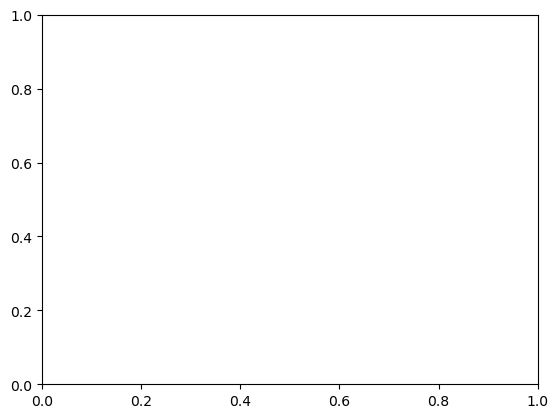

In [4]:
import importlib
import matplotlib.pyplot as plt

N = 500
fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))

if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)
JJ=1
J_val = JJ/(2*N)
J = J_val * J_interaction

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

# Exact solutions
enumerating all configurations.
Th. results

In [5]:
from python_lib.models import spins_model
import python_lib.models
importlib.reload(spins_model)
from python_lib.models import spins_model

device="cpu"
#device="mps"
CW_model = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=2
beta_init = 0.1
step = 39
betas = np.linspace(beta_init, beta_fin, step)

lr = 0.001
max_step = 100
batch_size=2000
std_fe_limit=1e-4
batch_iter=20
stats_step=1

In [6]:
from python_lib.models import spins_model
importlib.reload(spins_model)

CW_model_exact = spins_model.KW_exact_fast(N, H, J, J_interaction, device="cpu")
f_exact = []
f_exact_infN = []
steps = 0
for beta_ in betas:
    if steps % stats_step == 0:
        f_exact.append(CW_model_exact.exact(beta_))
        f_exact_infN.append(CW_model_exact.exact_infN(beta_))
    steps += 1


In [7]:
f_exact_infN[0]

{'beta': 0.1,
 'free_energy': -6.9310218272248285,
 'free_energy_std': 0,
 'mag_mean': 0.00999966715492648}

In [8]:
CW_model_exact.H[0].item()

0.0

In [9]:
data_exact = pd.DataFrame(f_exact)
f_exact_infN_pd = pd.DataFrame(f_exact_infN)
f_exact_infN_pd = f_exact_infN_pd.add_suffix("_inf")


In [10]:
data = data_exact
data = pd.concat([data, f_exact_infN_pd], axis = 1)


In [11]:
data

,beta,free_energy,free_energy_std,mag_mean,beta_inf,free_energy_inf,free_energy_std_inf,mag_mean_inf
0,0.10,-6.931525,0,0.037593,0.10,-6.931022,0,0.010000
1,0.15,-4.621064,0,0.038682,0.15,-4.620344,0,0.014999
2,0.20,-3.465851,0,0.039871,0.20,-3.464936,0,0.019997
3,0.25,-2.772739,0,0.041176,0.25,-2.771651,0,0.024995
4,0.30,-2.310679,0,0.042617,0.30,-2.309441,0,0.029991
5,0.35,-1.980650,0,0.044220,0.35,-1.979284,0,0.034986
6,0.40,-1.733144,0,0.046018,0.40,-1.731669,0,0.039979
7,0.45,-1.540654,0,0.048052,0.45,-1.539090,0,0.044970
8,0.50,-1.386679,0,0.050379,0.50,-1.385045,0,0.049958
9,0.55,-1.260717,0,0.053077,0.55,-1.259031,0,0.054945


In [12]:
data.dtypes

beta                   float64
free_energy            float64
free_energy_std          int64
mag_mean               float64
beta_inf               float64
free_energy_inf        float64
free_energy_std_inf      int64
mag_mean_inf           float64
dtype: object

<AxesSubplot:xlabel='beta'>

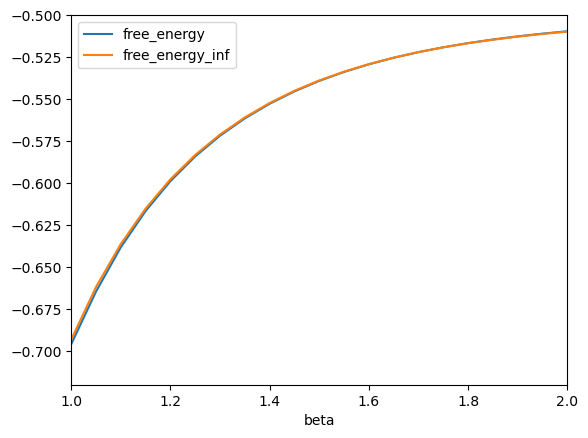

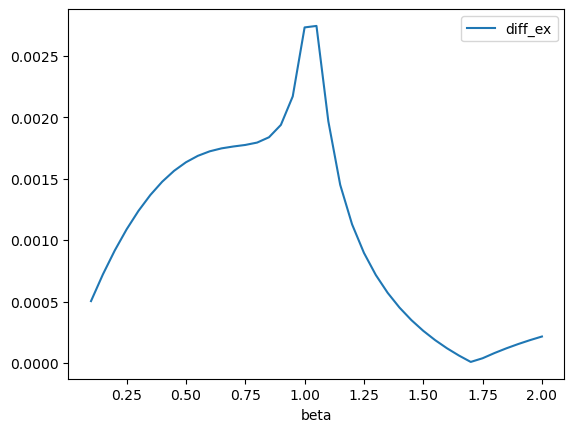

In [13]:
data.plot(x="beta", y= ["free_energy", "free_energy_inf"], ylim=[-0.72,-0.5], xlim=[1,2])
data["diff_ex"] = np.abs(data["free_energy"]- data[ "free_energy_inf"])
data.plot(x="beta", y= "diff_ex")


# Several cases

In [14]:
from python_lib.nets import list_nets
importlib.reload(list_nets)
import python_lib.nets.ann
importlib.reload(python_lib.nets.ann)
from python_lib import run_lib
importlib.reload(run_lib);

In [68]:
from python_lib.nets import cw_net
import importlib
importlib.reload(cw_net)
net2train = cw_net.one_var(CW_model, device=device)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_one_var_new",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 500
Total Params: 500
step: 48 0.10000 fe: -6.932 +- 0.00070 E: -0.000, S: 0.693, M: 0.0366 sample_t : 0.026 log_prob : 0.025 loss : 0.0044 optimizer : 0.0074 stats : 0.023

: 

: 

In [15]:
from python_lib.nets import cw_net
import importlib
importlib.reload(cw_net)
net2train = cw_net.one_var_sign(CW_model, device=device)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_one_var_sign",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 501
Total Params: 501
step: 119 1.45000 fe: -0.545 +- 0.00081 E: -0.340, S: 0.298, M: 0.825 sample_t : 0.029 log_prob : 0.018 loss : 0.0046 optimizer : 0.01 stats : 0.028455

KeyboardInterrupt: 

In [54]:
data.keys()

Index(['beta', 'free_energy', 'free_energy_std', 'mag_mean', 'beta_inf',
       'free_energy_inf', 'free_energy_std_inf', 'mag_mean_inf', 'diff_ex',
       'beta_one_var_new', 'free_energy_mean_one_var_new',
       'free_energy_std_one_var_new', 'entropy_mean_one_var_new',
       'energy_mean_one_var_new', 'mag_one_var_new', 'mag_mean_one_var_new',
       'fe_run_one_var_new', 'fe_std_run_one_var_new'],
      dtype='object')

In [ ]:
data["data"]

<AxesSubplot:xlabel='beta'>

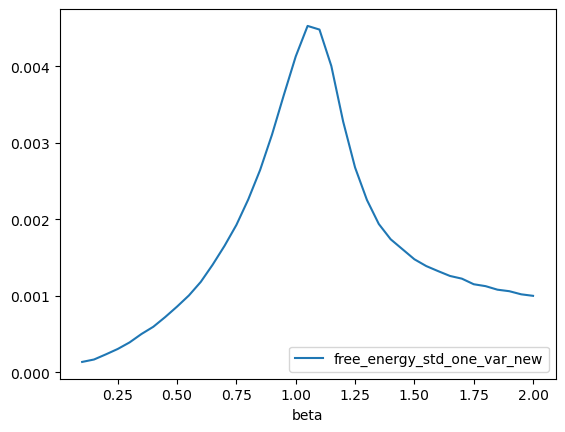

In [56]:
data.plot(x="beta", y="free_energy_std_one_var_new")

In [14]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(CW_model, bias=True, device=device)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 110
Total Params: 110
step: 1018 0.01000 fe: -69.315 +- 0.03844 E: 0.002, S: 0.693, M: 0.239 sample_t : 0.0014 log_prob : 0.00037 loss : 0.00014 optimizer : 0.00023 stats : 0.0142

: 

: 

In [15]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(CW_model, 
    bias=True, 
    device=device,
    net_depth=2,
    net_width=1
)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE_21",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 230
Total Params: 230
step: 0 2.00000 fe: -0.501 +- 0.00432 E: -0.382, S: 0.237, M: 0.9131533

In [16]:
from python_lib.nets import made
import importlib
importlib.reload(made);

net2train = made.MADE(CW_model, 
    bias=True, 
    device=device,
    net_depth=2,
    net_width=2
)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_MADE_22",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 450
Total Params: 450
step: 0 2.00000 fe: -0.501 +- 0.00264 E: -0.381, S: 0.241, M: 0.9121594

In [17]:
from python_lib.nets import simple_layer
import importlib
importlib.reload(simple_layer)
net2train = simple_layer.simple_layer(CW_model, bias=True, device=device)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_SL",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 110
Total Params: 110
step: 0 2.00000 fe: -0.501 +- 0.00473 E: -0.380, S: 0.243, M: 0.9191796

In [34]:
from python_lib.nets import ann
importlib.reload(ann)

from python_lib.nets import list_nets
importlib.reload(list_nets)

one = list_nets.one_var
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {"set_exact":False}
net2train = list_nets.list_nets(CW_model, one, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_one",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 100
Total Params: 100
step: 82 0.01000 fe: -69.315 +- 0.00373 E: 0.000, S: 0.693, M: 0.079 sample_t : 0.023 log_prob : 0.019 loss : 0.0003 optimizer : 0.0073 stats : 0.014013

KeyboardInterrupt: 

In [19]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sum_exp_exact",
    exact=True,
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 254
Total Params: 254
step: 0 2.00000 fe: -0.501 +- 0.00000 E: -0.379, S: 0.245, M: 0.9158

In [ ]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sum_exp",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


In [ ]:
# from python_lib.nets import list_nets
# importlib.reload(list_nets)

# list_n = list_nets.CW_net_sp
# input_mask = torch.tril(J_interaction, diagonal=-1)
# input_mask = input_mask.to(dtype=torch.bool)
# dict_nets = {"num_extremes": 1}
# net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
# res = run_lib.train_net(net2train, betas,
#     lr = lr,
#     max_step=max_step,
#     batch_size=batch_size,
#     std_fe_limit=std_fe_limit,
#     suffix ="_sp",
#     batch_iter=batch_iter
# )
# data = pd.concat([data, res], axis = 1)


In [ ]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net_sp
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {"num_extremes": 2}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sp2",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 182
Total Params: 182
step: 100 2.00000 fe: -0.501 +- 0.00351 E: -0.379, S: 0.244, M: 0.91547

In [ ]:
from python_lib.nets import list_nets
importlib.reload(list_nets)

list_n = list_nets.CW_net_sp
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.to(dtype=torch.bool)
dict_nets = {"num_extremes": 4}
net2train = list_nets.list_nets(CW_model, list_n, input_mask, device=device, dict_nets=dict_nets)
res = run_lib.train_net(net2train, betas,
    lr = lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit=std_fe_limit,
    suffix ="_sp4",
    batch_iter=batch_iter,
    stats_step=stats_step
)
data = pd.concat([data, res], axis = 1)


Total Trainable Params: 326
Total Params: 326
step: 100 2.00000 fe: -0.501 +- 0.00279 E: -0.380, S: 0.242, M: 0.91115

In [ ]:
data["beta"] = betas

In [ ]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_one",  "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]

for kk in name_nets:
    data[f"err_fe{kk}"] = np.abs(data[f"free_energy_mean{kk}"] - data["free_energy"])
    data[f"err_fe{kk}_rel"] = np.abs((data[f"err_fe{kk}"] / data["free_energy"]))


In [ ]:
data.to_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}_max_iter{max_step}_beta_step{step}.zip")

In [7]:
data = pd.read_csv(f"data/CW_N{N}_bs{batch_size}_fe_lim{std_fe_limit}_lr{lr}_max_iter{max_step}_beta_step{step}.zip")

<AxesSubplot:xlabel='beta'>

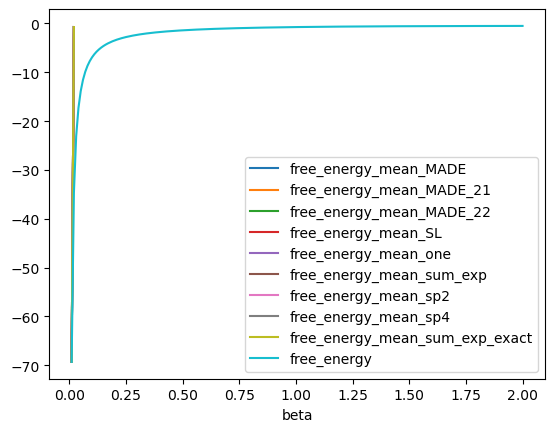

In [8]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_one",  "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
kkk="free_energy_mean"
namess=[f"{kkk}{x}" for x in name_nets]
namess.append("free_energy")
data.plot(x="beta", y=namess)


In [9]:
data

,Unnamed: 0,beta,free_energy,free_energy_std,mag_mean,beta_inf,free_energy_inf,free_energy_std_inf,mag_mean_inf,diff_ex,...,err_fe_one,err_fe_one_rel,err_fe_sum_exp,err_fe_sum_exp_rel,err_fe_sp2,err_fe_sp2_rel,err_fe_sp4,err_fe_sp4_rel,err_fe_sum_exp_exact,err_fe_sum_exp_exact_rel
0,0,0.01,-69.314944,0,0.248303,0.01,-69.314669,0,0.001000,0.000276,...,0.000002,3.088493e-08,0.000003,4.134755e-08,0.000005,7.560027e-08,0.000022,3.130792e-07,0.000008,1.101404e-07
1,1,0.02,-34.657814,0,0.249551,0.02,-34.657261,0,0.002000,0.000553,...,33.926370,9.788953e-01,33.926367,9.788952e-01,33.926378,9.788955e-01,33.926376,9.788955e-01,33.926367,9.788952e-01
2,2,0.03,-23.105592,0,0.250815,0.03,-23.104761,0,0.003000,0.000831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.04,-17.329599,0,0.252093,0.04,-17.328488,0,0.004000,0.001112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.05,-13.864099,0,0.253388,0.05,-13.862706,0,0.005000,0.001393,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,1.96,-0.503783,0,0.907568,1.96,-0.510924,0,0.953488,0.007141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,196,1.97,-0.503141,0,0.909627,1.97,-0.510640,0,0.954530,0.007499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,197,1.98,-0.502514,0,0.911640,1.98,-0.510364,0,0.955545,0.007850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,198,1.99,-0.501900,0,0.913610,1.99,-0.510096,0,0.956537,0.008196,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='beta'>

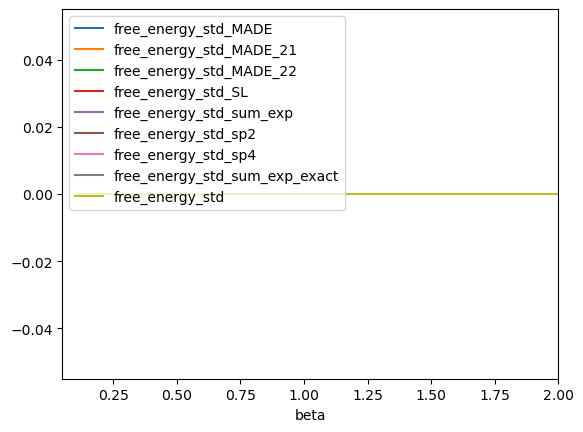

In [ ]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
kkk="free_energy_std"
namess=[f"{kkk}{x}" for x in name_nets]
namess.append("free_energy_std")
data[data["beta"]> 0.1].plot(x="beta", y=namess, xlim=(0.05,2))

<AxesSubplot:xlabel='beta'>

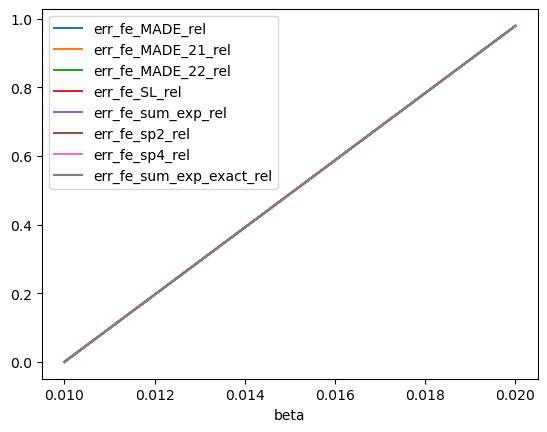

In [ ]:
name_nets=["_MADE", "_MADE_21", "_MADE_22", "_SL", "_sum_exp", "_sp2", "_sp4", "_sum_exp_exact"]
namess=[f"err_fe{x}_rel" for x in name_nets]
#namess.append("free_energy_std")
data.plot(x="beta", y=namess)

<AxesSubplot:xlabel='beta'>

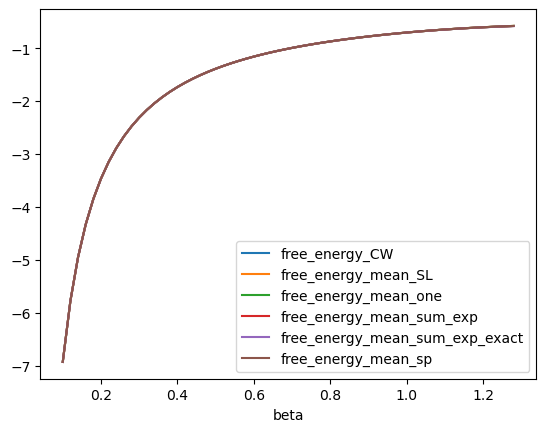

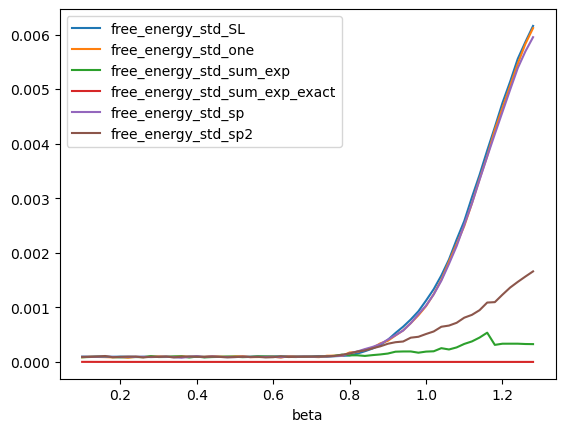

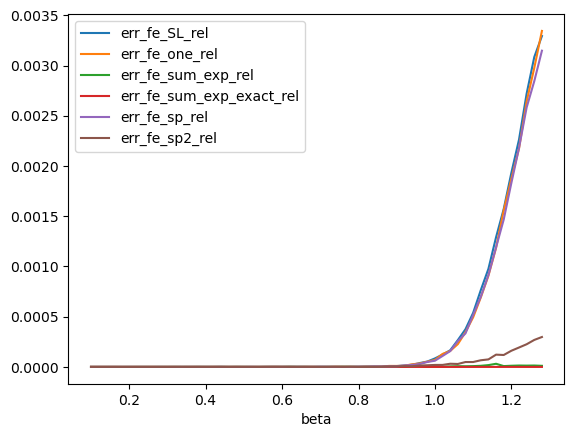

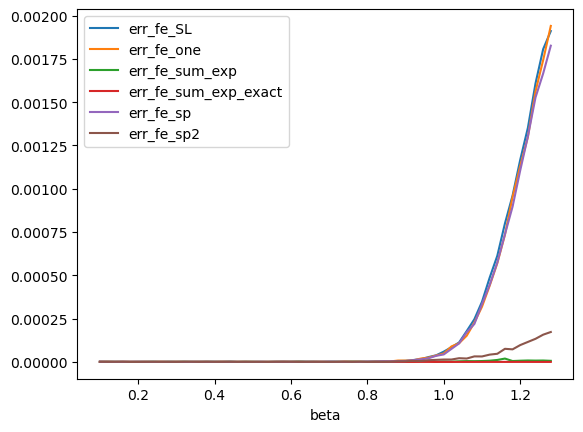

In [27]:

data.plot(x="beta", y=["free_energy_std_SL", "free_energy_std_one", "free_energy_std_sum_exp", "free_energy_std_sum_exp_exact","free_energy_std_sp","free_energy_std_sp2",]) #"free_energy_std_sp4"])
data.plot(x="beta", y=["err_fe_SL_rel", "err_fe_one_rel", "err_fe_sum_exp_rel", "err_fe_sum_exp_exact_rel","err_fe_sp_rel","err_fe_sp2_rel"])#,"err_fe_sp4_rel"])
data.plot(x="beta", y=["err_fe_SL", "err_fe_one", "err_fe_sum_exp", "err_fe_sum_exp_exact", "err_fe_sp", "err_fe_sp2"])# "err_fe_sp4"])

In [ ]:
data.plot(x="beta", y=["mag_mean", "mag_mean_CW", "mag_mean_SL", "mag_mean_one", "mag_mean_sum_exp", "mag_mean_sum_exp_exact"])


KeyError: "['mag_mean'] not in index"

In [129]:
data.plot(x="beta", y=["entropy_mean", "entropy_mean_SL", "entropy_mean_1V", "entropy_mean_SK", "entropy_mean_SK_exact"])


KeyError: "['entropy_mean', 'entropy_mean_1V', 'entropy_mean_SK', 'entropy_mean_SK_exact'] not in index"

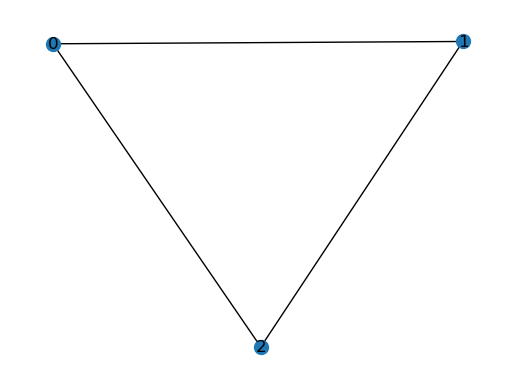

In [30]:
from python_lib.models import spins_model
import python_lib.models
importlib.reload(spins_model)
from python_lib.models import spins_model

N = 3
fig, ax0 = plt.subplots(1,1)
J_interaction = torch.ones(N,N) - torch.eye(N, N)

inter_H = 0
H = inter_H * (torch.ones(N))

if N < 200:
    graph_gen.plot_matrix_graph(J_interaction, ax0)
JJ=1
J_val = JJ/(2*N)
J = J_val * J_interaction


device="cpu"
#device="mps"
CW_model = spins_model.model(N, H, J, J_interaction, device=device)
beta_fin=1.3
beta_init = 0.1
step = 0.1
betas = np.arange(beta_init, beta_fin
, step)

In [31]:
from python_lib.nets import ann
importlib.reload(ann)
from python_lib.nets import list_nets
importlib.reload(list_nets)

one = list_nets.SK_net
input_mask = torch.tril(J_interaction, diagonal=-1)
input_mask = input_mask.long()
dict_nets = {}
net2train = list_nets.list_nets(CW_model, one, input_mask, device=device, dict_nets=dict_nets)

In [33]:
beta = 1
net2train.train(
    beta=beta,
    lr=lr,
    max_step=max_step,
    batch_size=batch_size,
    std_fe_limit = 0.001,
    exact=True
)


step: 0 1.00 fe: -0.594 +- 0.24724 E: 0.069, S: 0.662, M: 0.397

{'beta': 1,
 'free_energy_mean': -0.5935537020365397,
 'free_energy_std': 0.2472420334815979,
 'entropy_mean': 0.6624425649642944,
 'energy_mean': 0.06888888776302338,
 'mag': array([ 0.001, -0.008,  0.034], dtype=float32),
 'mag_mean': 0.3966667056083679}

In [51]:
x, hx=net2train.sample(200000)
torch.abs(x.mean(-1)).mean(), x.mean(-1).mean()

(tensor(0.3982), tensor(0.0010))

In [54]:
i = 0
for nnet in net2train.net:
    print(f"ni: {i}")
    i+=1
    for name, param in nnet.named_parameters():
        print(name, param.data)


ni: 0
weight_p tensor([[ 0.3333,  0.0000, -0.3333]])
bias_p tensor([[1.0000, 0.6931, 0.3333]])
weight_m tensor([[ 0.3333,  0.0000, -0.3333]])
bias_m tensor([[0.3333, 0.6931, 1.0000]])
weight_0p tensor([1.])
weight_0m tensor([-1.])
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])
ni: 1
weight_p tensor([[ 0.1667, -0.1667]])
bias_p tensor([[0.3333, 0.0000]])
weight_m tensor([[ 0.1667, -0.1667]])
bias_m tensor([[0.0000, 0.3333]])
weight_0p tensor([1.])
weight_0m tensor([-1.])
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])
ni: 2
weight_0 tensor([-0.3333])
bias_0 tensor([-0.])


In [198]:
m = x.sum(-1)
m

tensor([ 2., -6.])

In [205]:
weight_p = torch.tensor([[1,2,3,4]], device=device)

In [206]:
weight_p

tensor([[1, 2, 3, 4]])

In [208]:
res = weight_p * torch.unsqueeze(m, dim=1)
res

tensor([[  2.,   4.,   6.,   8.],
        [ -6., -12., -18., -24.]])

In [210]:
torch.logsumexp(res, 1)

tensor([ 8.1451, -5.9975])

In [ ]:
pd.__version__

In [ ]:
data.plot(x="beta", y=["free_energy_std_SL", "free_energy_std_1V"], ylim=(0, 0.1))

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
stats_pd.plot.line(x="beta", y="energy_mean")

In [ ]:
stats_pd.plot.line(x="beta", y="energy_mean")

In [ ]:
all_Js = np.array(all_Js)

In [ ]:
plt.plot(stats_pd["beta"], all_Js[:,2])
plt.plot(stats_pd["beta"], all_Js[:,3])
plt.plot(stats_pd["beta"], all_Js[:,4])
plt.plot(stats_pd["beta"], all_Js[:,5])
plt.plot(stats_pd["beta"], all_Js[:,19])

In [ ]:
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

In [ ]:
from python_lib.nets import simplest
from python_lib.solvers import train_nn_anneal
importlib.reload(simplest)
importlib.reload(solvers)
bias = True
net_simplest = simplest.simplest(CW_model.N, CW_model, bias, device=device)

In [ ]:
from python_lib.nets import one_var
importlib.reload(one_var)
bias = True
net_one_var = one_var.one_var(CW_model.N, CW_model, bias, device=device)

In [ ]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=1000
batch_size=1000
stats = []
net2train = net_one_var
for beta in betas:
    net2train.train(
        beta=beta,
        lr=lr,
        max_step=max_step,
        batch_size=batch_size,
        std_fe_limit = 0.001
    )

    stats.append(net.compute_stats(
        beta, batch_size=batch_size, print_=True))
stats_pd = pd.DataFrame(stats)

In [ ]:
stats_pd_est = pd.DataFrame(stats)
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd_est["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,0.)

ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"])/np.abs(f_exact))
ax1.plot(betas, np.abs(f_exact-stats_pd_est["free_energy_mean"]))
    
ax2.plot(stats_pd_est["free_energy_std"])

In [ ]:
net_simplest.layer1.weight

In [ ]:
from python_lib.solvers import train_nn_anneal
importlib.reload(simple_layer)
importlib.reload(solvers)
import pandas as pd

lr = 0.001
max_step=100
batch_size=2000
stats = train_nn_anneal(
    net, 
    np.full(100, 0.0001),
    lr=lr, 
    max_step=5,
    batch_size=batch_size)
stats = train_nn_anneal(
    net, 
    betas,
    lr=lr, 
    max_step=max_step,
    batch_size=batch_size)
stats_pd = pd.DataFrame(stats)

In [ ]:
stats_pd = pd.DataFrame(stats)

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"])/np.abs(f_exact))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(3,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(betas, f_exact)
ax0.set_ylim(-1.25,-0.6)

ax1.plot(betas, np.abs(f_exact-stats_pd["free_energy_mean"]))
    
ax2.plot(stats_pd["free_energy_std"])

In [ ]:
stats_pd.keys()

In [ ]:
stats_pd[stats_pd["beta"]==0.2]

In [ ]:
import matplotlib.pyplot as plt
fig, (ax0, ax1) = plt.subplots(2,1)
ax0.plot(betas, stats_pd["free_energy_mean"], ".")
ax0.plot(np.linspace(0.001,beta,100), f_exact)
ax0.set_ylim(-1.25,-0.7)

for b in np.linspace(0.001,beta,100):
    
err = [np.abs()]

In [ ]:
net.compute_stats(beta, batch_size=50000)

## random case

In [ ]:
from python_lib.nets import bp_nn
importlib.reload(bp_nn)

net_rand = bp_nn.bp_nn(tree_rand.N, tree_rand, True, z2=False, init_zero=False,)
                      
net_rand.train(beta=beta, lr=0.001, 
           max_step=1000,
               opt="adam")


In [ ]:
net_rand.compute_stat_is(beta, batch_size=10000)

# BP solution

In [ ]:
import bp_solver
importlib.reload(bp_solver)

bp_sol = bp_solver.BP_solver(tree_rand)

In [ ]:
beta

In [ ]:
bp_sol.converge(beta)